# Actividad 2 Curso 4 Parte 3: Aplicaciones en Ciencias de Datos e Inteligencia Artificial

### 3 Deploy (opcional)

**Autor: Dora Novoa**

* Incluya los cuatro modelos en una clase, de modo que se puedan ajustar, visualizar y predecir con las
tres variantes. Considere los parámetros que requiere cada opción.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

class regression():
    def __init__(self, tipo_regresion, x, y, grado=None, alpha=None):
        self.x = x
        self.y = y
        self.tipo_regresion = tipo_regresion
        self.grado = grado
        self.alpha = alpha

    def escalar_datos(self, X):
        # estandarizar los datos
        scaler = MinMaxScaler()
        return scaler.fit_transform(X)
    
    def training_test_split(self, X, test_s=0.2, ran_state=13):
        # divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
        X_train, X_test, y_train, y_test = train_test_split(X, self.y, test_size=test_s, random_state=ran_state)
        return X_train, X_test, y_train, y_test

    def seleccionar_regresion(self):
        if self.x.shape[1] == 1:
            X = self.x.reshape(-1, 1)
            X_std = self.escalar_datos(X)
        else:
            X_std = self.escalar_datos(self.x)
        
        X_train, X_test, y_train, y_test = self.training_test_split(X_std)
        
        match self.tipo_regresion:
            case "lineal":
                modelo_lineal = LinearRegression()
                modelo_lineal.fit(X_std, self.y)
                y_pred_lin = modelo_lineal.predict(X_std)

                # graficamos
                titulo = self.imprimir_formula(modelo_lineal.intercept_, modelo_lineal.coef_, self.tipo_regresion)
                self.graficar_regresion(X_std, y_pred_lin, titulo)
                
                return modelo_lineal
            
            case "polinomial":
                modelo_poly = PolynomialFeatures(self.grado)
                X_poly = modelo_poly.fit_transform(X_std)
                modelo = LinearRegression()
                modelo.fit(X_poly, self.y)
                
                x_linea = np.linspace(X_std.min(), X_std.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
                y_linea = modelo.predict(modelo_poly.transform(x_linea))
                
                # graficamos
                titulo = self.imprimir_formula(modelo.intercept_, modelo.coef_, self.tipo_regresion)
                self.graficar_regresion(x_linea, y_linea, titulo)
                
                return modelo
            
            case "lasso":
                # if X_std.shape[1] == 1:
                    # como la matriz tiene sólo una columna, debo transformarla a polinomial elevando a la potencia del grado
                poly = PolynomialFeatures(self.grado)
                X_train_poly = poly.fit_transform(X_train)
                X_test_poly = poly.fit_transform(X_test)
                                    
                lasso = Lasso(alpha=self.alpha).fit(X_train_poly, y_train)
                y_pred_l = lasso.predict(X_test_poly)
                print('Error Cuadrático Medio Lasso:', mean_squared_error(y_test, y_pred_l))
                
                # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                CV = 5
                best_alpha = self.obtener_best_alpha(lasso, CV, X_train_poly, y_train)
                print('Mejor alpha:', best_alpha)
                
                # ajustar el modelo con el mejor alpha
                lasso_best = Lasso(alpha=best_alpha).fit(X_train_poly, y_train)
                y_pred_l_best = lasso_best.predict(X_test_poly)
                print('Error Cuadrático Medio best Lasso:', mean_squared_error(y_test, y_pred_l_best))
                
                # usamos el linspace para generar una uniforme línea de ajuste en X

                x_linea = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
 
                x_linea_poly = poly.fit_transform(x_linea)
                y_pred_l_poly = lasso_best.predict(x_linea_poly)
                
                # graficamos
                titulo = self.imprimir_formula(lasso_best.intercept_, lasso_best.coef_, self.tipo_regresion)
                self.graficar_regresion(x_linea, y_pred_l_poly, titulo)
                
                return lasso_best
                
                # else:
                    # lasso = Lasso(alpha=self.alpha).fit(X_train, y_train)
                    # y_pred_l = lasso.predict(X_test)
                    # print('Error Cuadrático Medio Lasso:', mean_squared_error(y_test, y_pred_l))
                    
                    # # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    # CV = 5
                    # best_alpha = self.obtener_best_alpha(lasso, CV, X_train, y_train)
                    # print('Mejor alpha:', best_alpha)
                    
                    # # ajustar el modelo con el mejor alpha
                    # lasso_best = Lasso(alpha=best_alpha).fit(X_train, y_train)
                    # y_pred_l_best = lasso_best.predict(X_test)
                    # print('Error Cuadrático Medio best Lasso:', mean_squared_error(y_test, y_pred_l_best))
                    # # usamos el linspace para generar una uniforme línea de ajuste en X
                    # x_linea = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
                    
                    
                    # # graficamos
                    # titulo = self.imprimir_formula(lasso_best.intercept_, lasso_best.coef_, self.tipo_regresion)
                    # self.graficar_regresion(x_linea, y_pred_l_best, titulo)
                    
                    # return lasso_best
                    

            case "ridge":
                if X_std.shape[1] == 1:
                    # como la matriz tiene sólo una columna, debo transformarla a polinomial elevando a la potencia del grado
                    poly = PolynomialFeatures(self.grado)
                    X_train_poly = poly.fit_transform(X_train)
                    X_test_poly = poly.fit_transform(X_test)
                    
                    ridge = Ridge(alpha=self.alpha).fit(X_train_poly, y_train)
                    y_pred_r = ridge.predict(X_test_poly)
                    print('Error Cuadrático Medio Ridge:', mean_squared_error(y_test, y_pred_r))
                    
                    # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    CV = 5
                    best_alpha = self.obtener_best_alpha(ridge, CV, X_train_poly, y_train)
                    print('Mejor alpha:', best_alpha)
                    
                    # ajustar el modelo con el mejor alpha
                    ridge_best = Ridge(alpha=best_alpha).fit(X_train_poly, y_train)
                    y_pred_r_best = ridge_best.predict(X_test_poly)
                    print('Error Cuadrático Medio best Ridge:', mean_squared_error(y_test, y_pred_r_best))
                    
                    # usamos el linspace para generar una uniforme línea de ajuste en X
                    x_linea = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
                    x_linea_poly = poly.fit_transform(x_linea)
                    y_pred_r_poly = ridge_best.predict(x_linea_poly)
                    
                    # graficamos
                    titulo = self.imprimir_formula(ridge_best.intercept_, ridge_best.coef_, self.tipo_regresion)
                    self.graficar_regresion(x_linea, y_pred_r_poly, titulo)
                    
                    return ridge_best
                
                else:
                    ridge = Ridge(alpha=self.alpha).fit(X_train, y_train)
                    y_pred_r = ridge.predict(X_test)
                    print('Error Cuadrático Medio Ridge:', mean_squared_error(y_test, y_pred_r))
                    
                    # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    CV = 5
                    best_alpha = self.obtener_best_alpha(ridge, CV, X_train, y_train)
                    print('Mejor alpha:', best_alpha)
                    
                    # ajustar el modelo con el mejor alpha
                    ridge_best = Ridge(alpha=best_alpha).fit(X_train, y_train)
                    y_pred_r_best = lasso_best.predict(X_test)
                    print('Error Cuadrático Medio best Ridge:', mean_squared_error(y_test, y_pred_r_best))

                    # graficamos
                    titulo = self.imprimir_formula(ridge_best.intercept_, ridge_best.coef_, self.tipo_regresion)
                    self.graficar_regresion(X_test, y_pred_r_best, titulo)
                    
                    return ridge_best
    
    # función para obtener el mejor alpha con validación cruzada
    def obtener_best_alpha(self, modelo, val_iteraciones, X_train, y_train):
        from sklearn.model_selection import GridSearchCV
       
        param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]} # valores de alpha a probar
        modelo_CV = GridSearchCV(modelo, param_grid, cv=val_iteraciones, n_jobs=-1) # cross validation de val_iteraciones
        modelo_CV.fit(X_train, y_train)
        best_alpha = modelo_CV.best_params_['alpha']
        return best_alpha
    
    # función para imprimir la fórmula de la regresión
    def imprimir_formula (self, intercepto, coefs, nombre_modelo):
        if nombre_modelo == "lineal":
            formula = f"y = {intercepto.round(2)} + {coefs[0].round(2)}*x"
        else: 
            formula = f"y = {intercepto.round(2)} "
            # para cada uno de los coefs, es decir los thetas o x^n 
            for i, coef in enumerate(coefs):
                if abs(coef) > 0.00000001: # si el coeficiente es muy pequeño no lo toma en cuenta
                    formula += f"+ {coef.round(3)}x^{i} "    
        return formula
    
    # función para graficar la regresión            
    def graficar_regresion(self, x_line, y_line, titulo=None):
        X_std = self.escalar_datos(self.x)
        plt.plot(x_line, y_line, color='red') # graficar la recta de ajuste
        plt.scatter(X_std, self.y, color='blue', alpha=0.4) # graficar los datos 
        if titulo:
            plt.title("Regresión " + str(self.tipo_regresion).capitalize() + "\n" + titulo)
        else:
            plt.title("Regresión \n" + self.tipo_regresion)
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()

* Genere una función para guardar el modelo. Para esto puede guardar los coeficientes en un archivo
o puede usar una librería como Pickle.


In [56]:
import os
import pandas as pd

def guardar_modelo(nombre_reg, modelo):
    
    # los coeficientes del modelo y el intercepto los guardo primero en una lista
    datos = [modelo.intercept_]
    datos.extend(modelo.coef_)
    
    # guardar los índices de los coeficientes en un dataframe
    coefs = []
    indices = []
    for i, coef in enumerate(datos):
        if abs(coef) > 0.0000000001: # si el coeficiente es muy pequeño no lo toma en cuenta
            coefs.append(coef)
            if i == 0: indices.append("Intercepto") # agrega el intercepto
            else: indices.append(f"x^{i}")
    
    # crear el dataframe
    df = pd.DataFrame(coefs, index=indices , columns=['Coeficientes'])
    
    # los dejaré en una subcarpeta llamada datos_exportados, si no existe la creará
    carpeta = "datos_exportados"
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
        
    # guardar en un archivo csv, los dejo en la carpeta datos_exportados  
    ruta_archivo = os.path.join(carpeta, f"coef_Regresion_{nombre_reg}.csv")
    df.to_csv(ruta_archivo)
    print(f"Coeficientes guardados en {ruta_archivo}")
    
    return df
## Aqui podemos cambiar a la regresión que queramos ejercutar, como lineal, polinomial, lasso, ridge
df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values


regresion = regression("lasso", x, y, 6, 0.001)
modelo_result = regresion.seleccionar_regresion()
df_r = guardar_modelo("lasso", modelo_result)
df_r

IndexError: tuple index out of range

* Genere una función para cargar y predecir usando el modelo cargado.

In [3]:
def cargar_predecir(ruta, var_ind:list, var_dep, nombre_modelo):
    # var_ind es un lista con el nombre de las columnas de variables independientes
    # cargar los datos
    df = pd.read_csv({ruta}, encoding="latin-1", sep=",")
    
    



* Cree un notebook que le permita usar la clase creada. Implemente tres ejemplos de uso.
* ¿Cómo podría testear la clase implementada?, proponga método para testear que todo está
funcionando bien.

Error Cuadrático Medio Lasso: 1.4480751820909503
Mejor alpha: 0.001
Error Cuadrático Medio best Lasso: 1.4480751820909503


c:\Users\doran\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.778e-02, tolerance: 2.486e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\doran\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.778e-02, tolerance: 2.486e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\doran\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (78,)

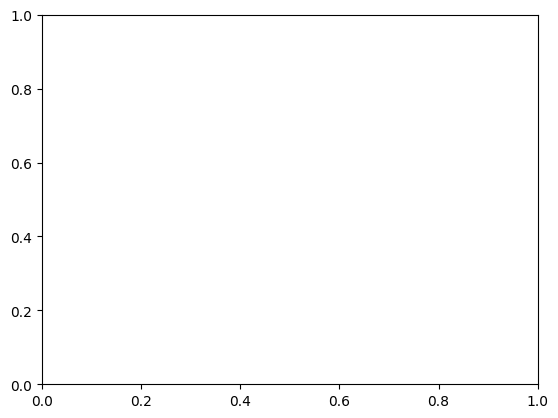

In [54]:

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")
df.dtypes
var_ind = ["distance","speed","temp_inside","temp_outside"]
var_dep = "consume" 
df_use = pd.DataFrame()

for nombre_col in df.columns.values:
    if nombre_col in var_ind:
        if df[nombre_col].dtype == 'object':
            df_use[nombre_col] = df[nombre_col].str.replace(',', '.').fillna(0).astype(float)
        else:  # Si ya es numérica (int o float), copiar directamente
            df_use[nombre_col] = df[nombre_col]
    
x = df_use
y = df[var_dep].str.replace(',', '.').astype(float).values

regresion = regression("lasso", x, y, 6, 0.001)
modelo_result = regresion.seleccionar_regresion()


